In [ ]:
#thêm các thư viện 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
palette = sns.color_palette("Spectral")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
%matplotlib inline


In [ ]:
from google.colab import drive 
drive.mount('/content/drive') #kết nối vào drive

Mounted at /content/drive


In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/winequality-white.csv', sep=';')

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
#Kiểm tra 5 dòng dữ liệu đầu tiên
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Thông tin về các cột dữ liệu
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# **KIỂM TRA THỐNG KÊ CƠ BẢN CỦA DỮ LIỆU**

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Axes: xlabel='quality', ylabel='fixed acidity'>

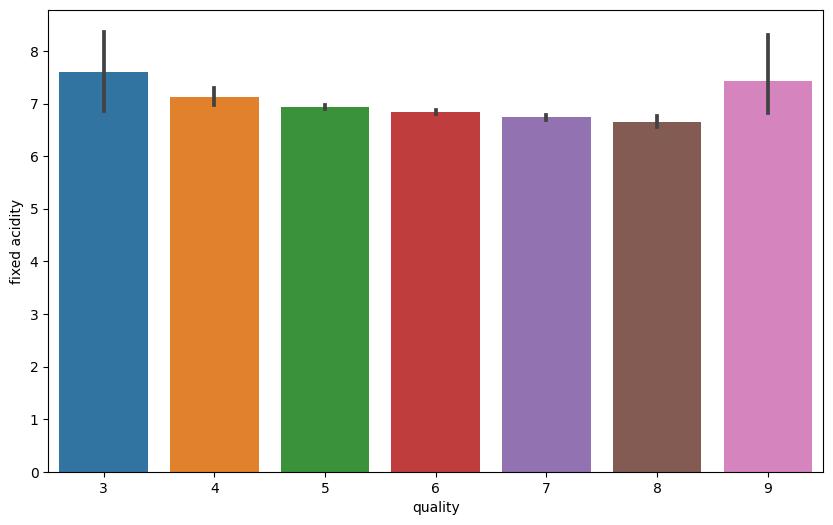

In [ ]:
###vẽ sơ đồ để biết các cột dữ liệu được phân bổ như thế nào trong tập dữ liệu
#Biểu đồ phân bố axit cố định
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)


<Axes: xlabel='quality', ylabel='volatile acidity'>

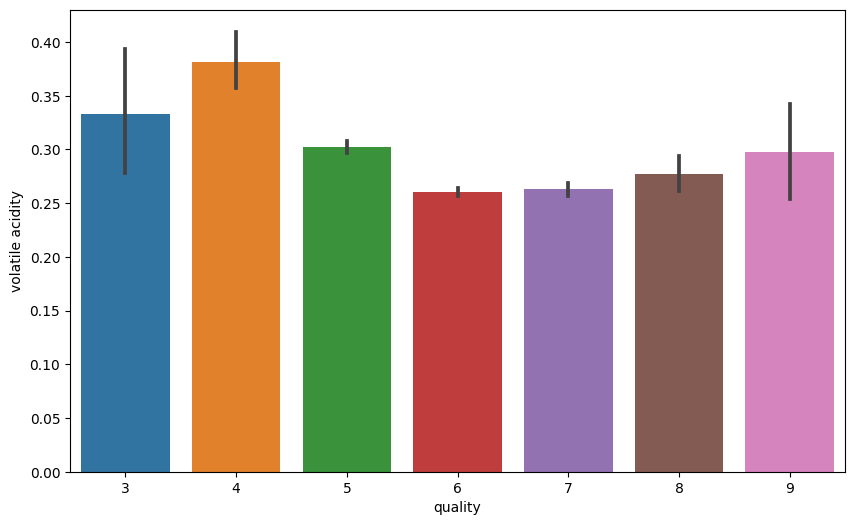

In [ ]:
#Biểu đồ phân bố axit bay hơi
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

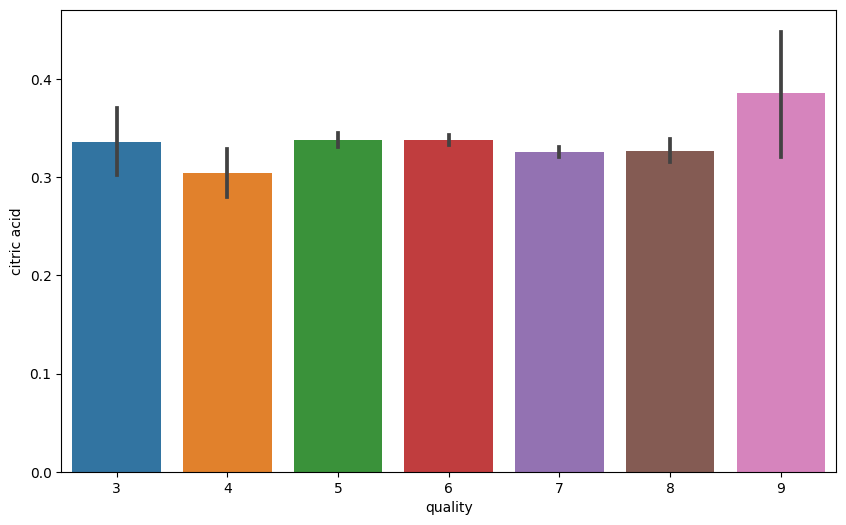

In [ ]:
#Biểu đồ phân bố axit citric
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

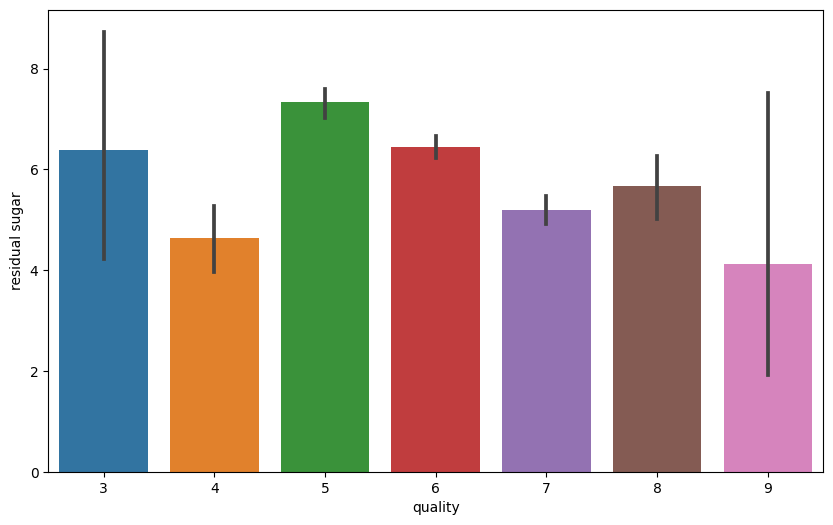

In [ ]:
#Biểu đồ phân bố Lượng đường dư
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

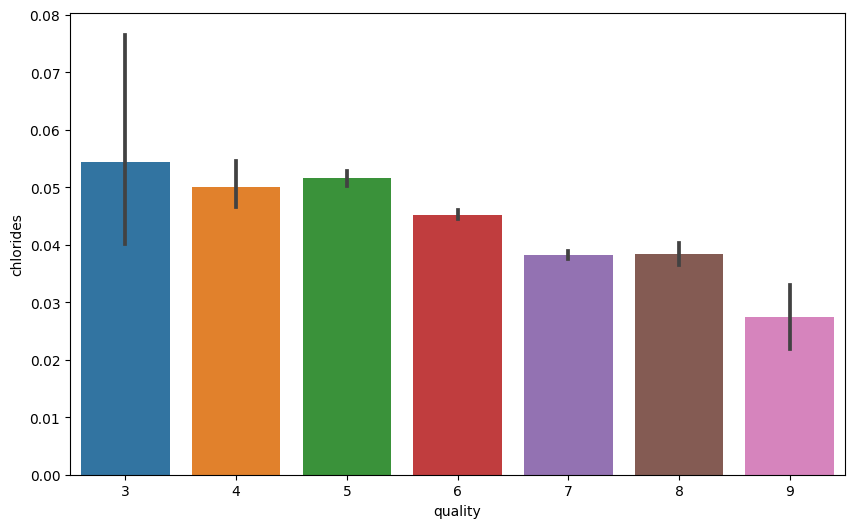

In [ ]:
#Biểu đồ phân bố thành phần clorua
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

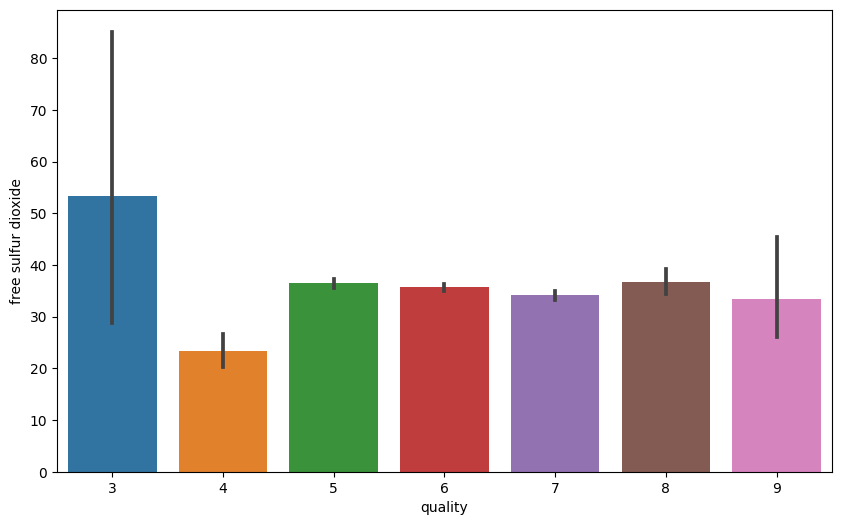

In [ ]:
#Biểu đồ phân bố thành phần sulfur dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

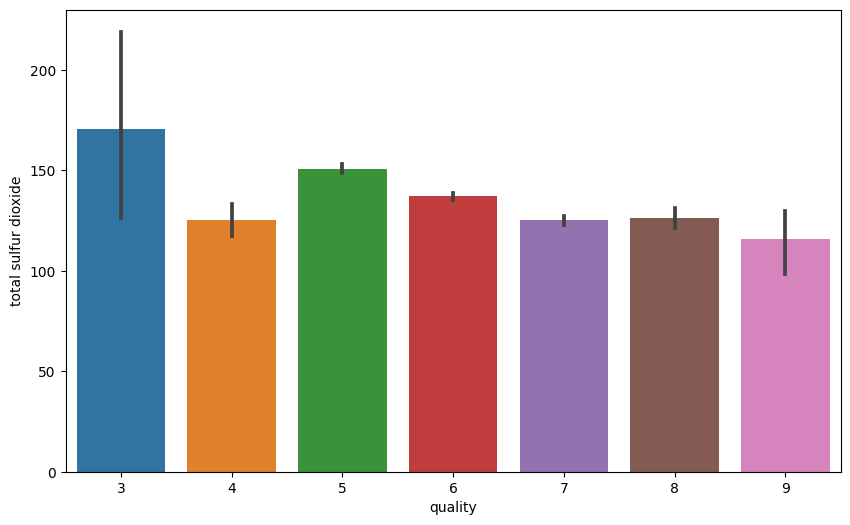

In [ ]:
#Biểu đồ phân bố thành phần tổng sulfur dioxide 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

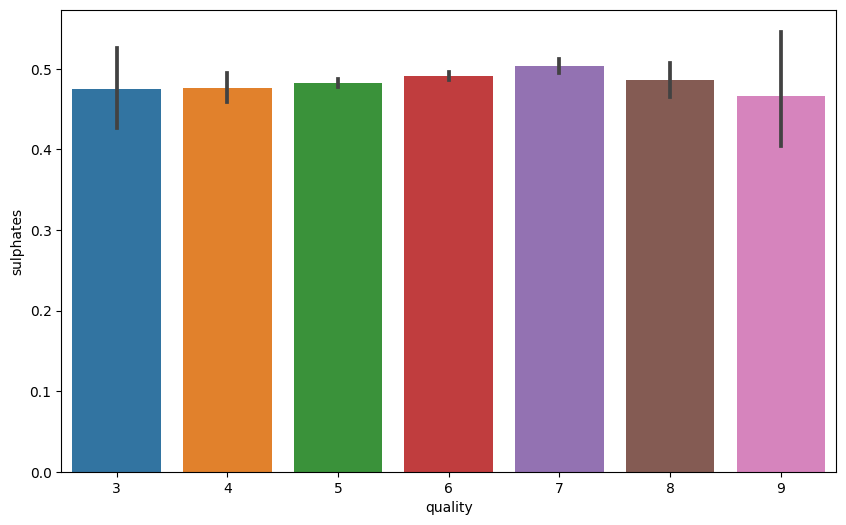

In [ ]:
#Biểu đồ phân bố thành phần Sunfat
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

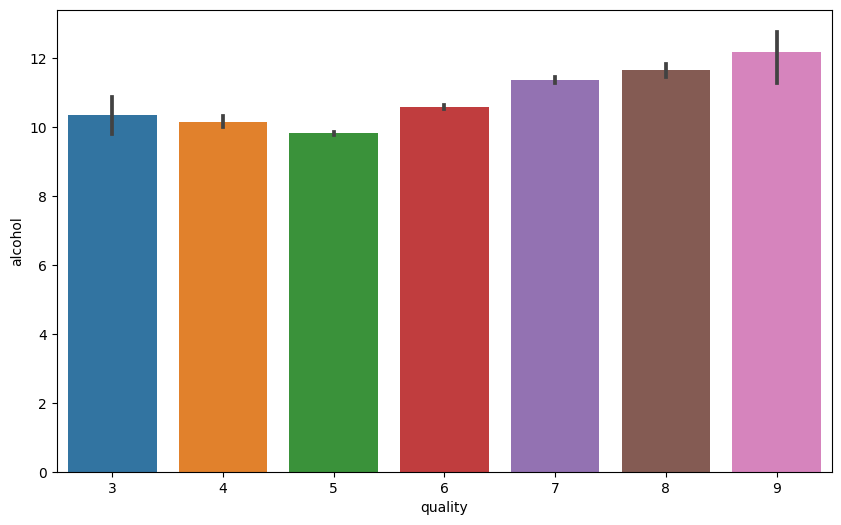

In [ ]:
#Biểu đồ phân bố độ cồn
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# **Tiền xử lý Dữ liệu để thực hiện thuật toán **

In [ ]:
# Chuyển đổi đầu ra liên tục thành đầu ra phân loại:
# Bad: 0-5
# Good: 6-10
wine['quality'] = pd.cut( wine['quality'], bins = [2, 5, 8], labels = ["bad", "good"])
# Hiển thị tần số đầu ra
wine['quality'].value_counts()

good    3253
bad     1640
Name: quality, dtype: int64

<Axes: >

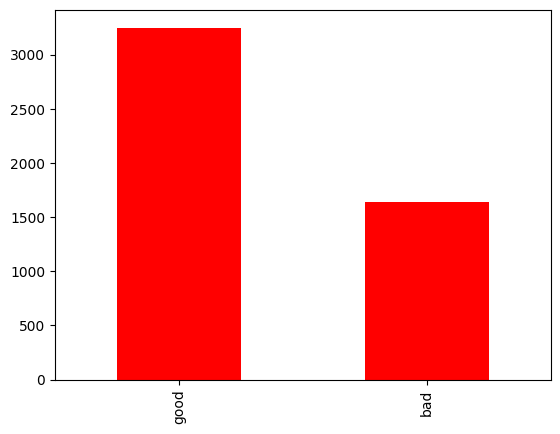

In [ ]:
#Biểu đồ thể hiện rượu Good or Bad
wine['quality'].value_counts().plot(kind='bar', colormap='hsv')

<ipython-input-13-d06a67c81a76>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(), annot=True, cmap=plt.cm.Spectral)


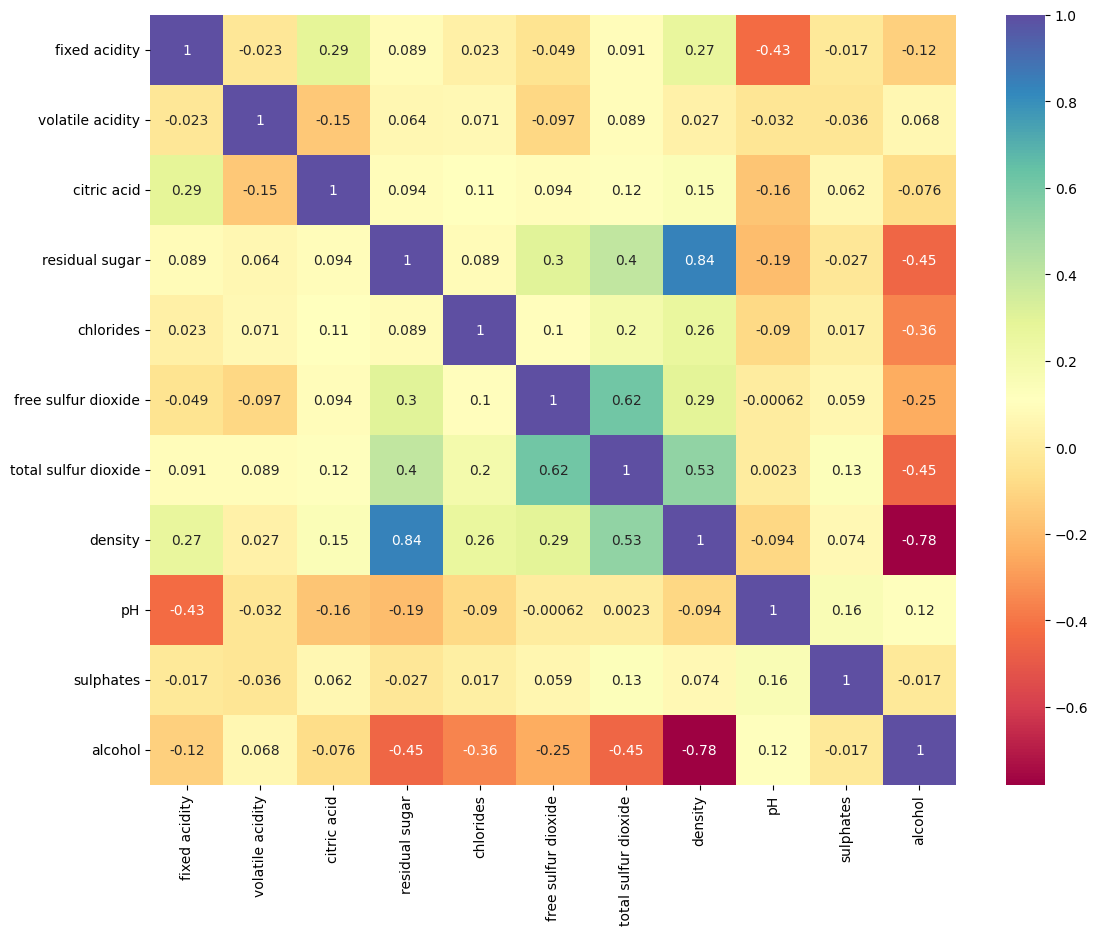

In [ ]:
#Biểu đồ Heatmap 
# mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(13, 10))
sns.heatmap(wine.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/a

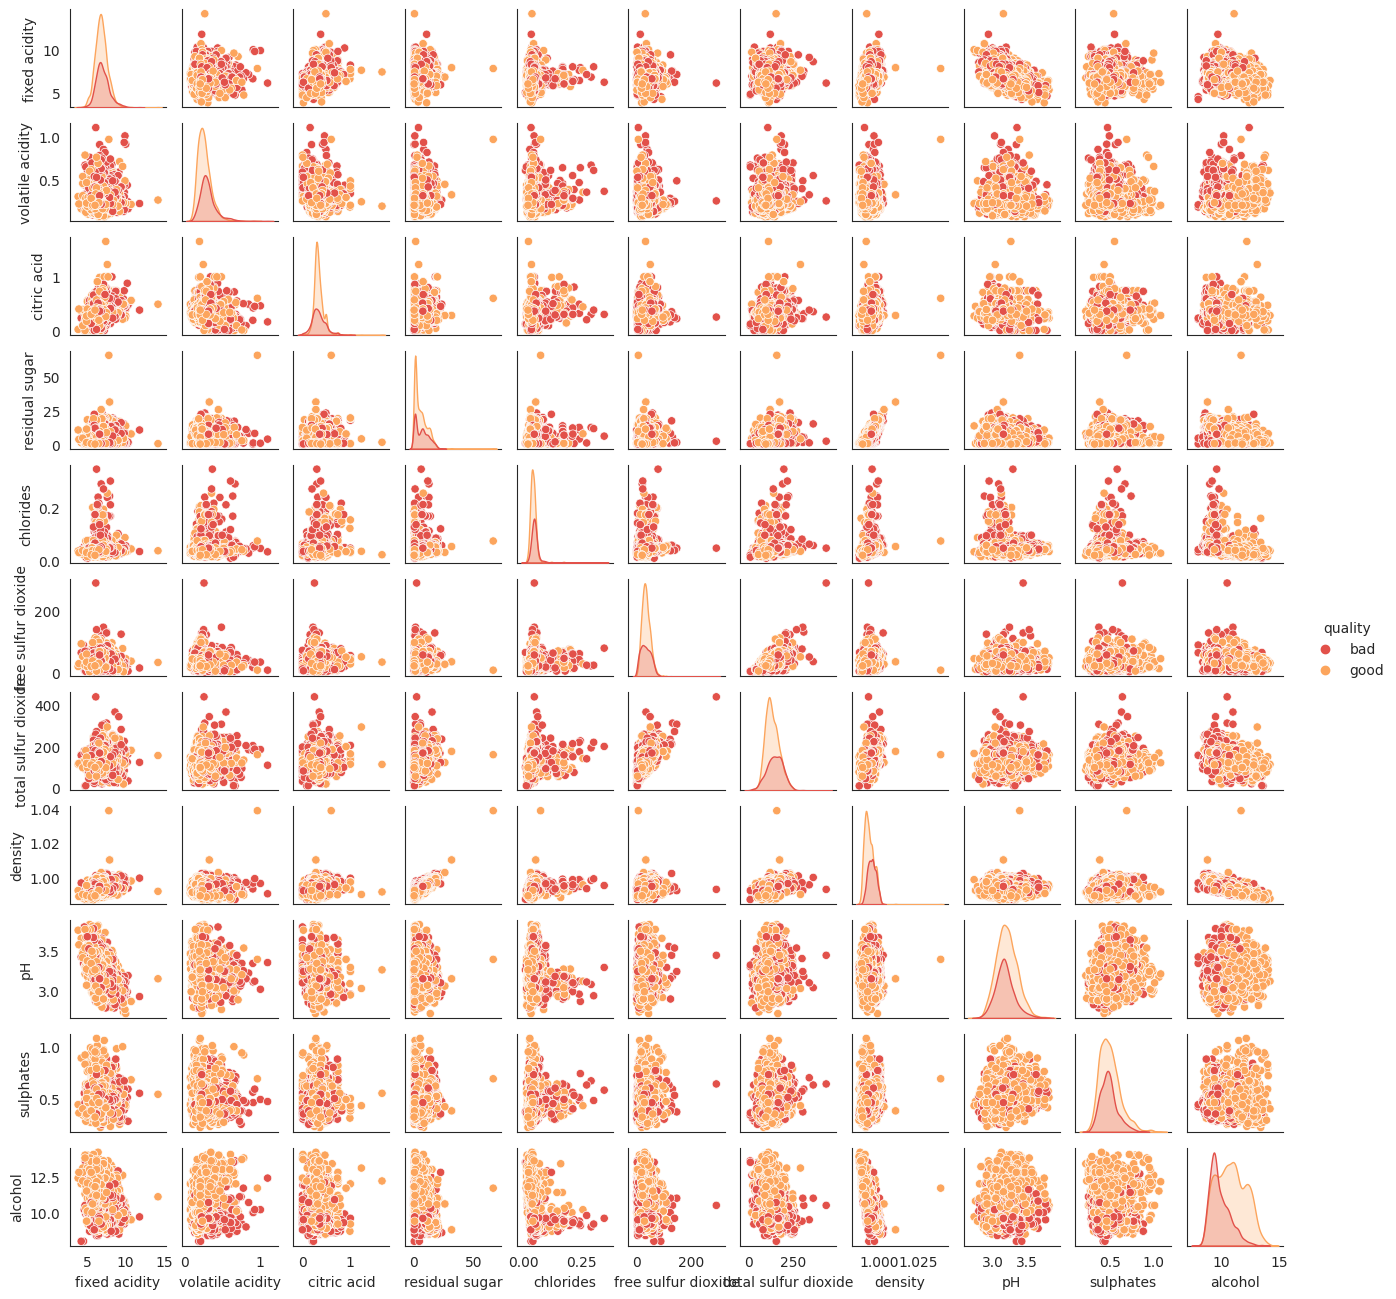

In [ ]:
#Mối quan hệ giữa các nội dung biến trong rượu vang đỏ
#Kiểm tra số lượng giá trị trong tập dữ liệu
sns.pairplot(wine, hue='quality', palette=palette, size=1.2, diag_kind = 'kde')
plt.show()

In [ ]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


GridSpec(6, 6)

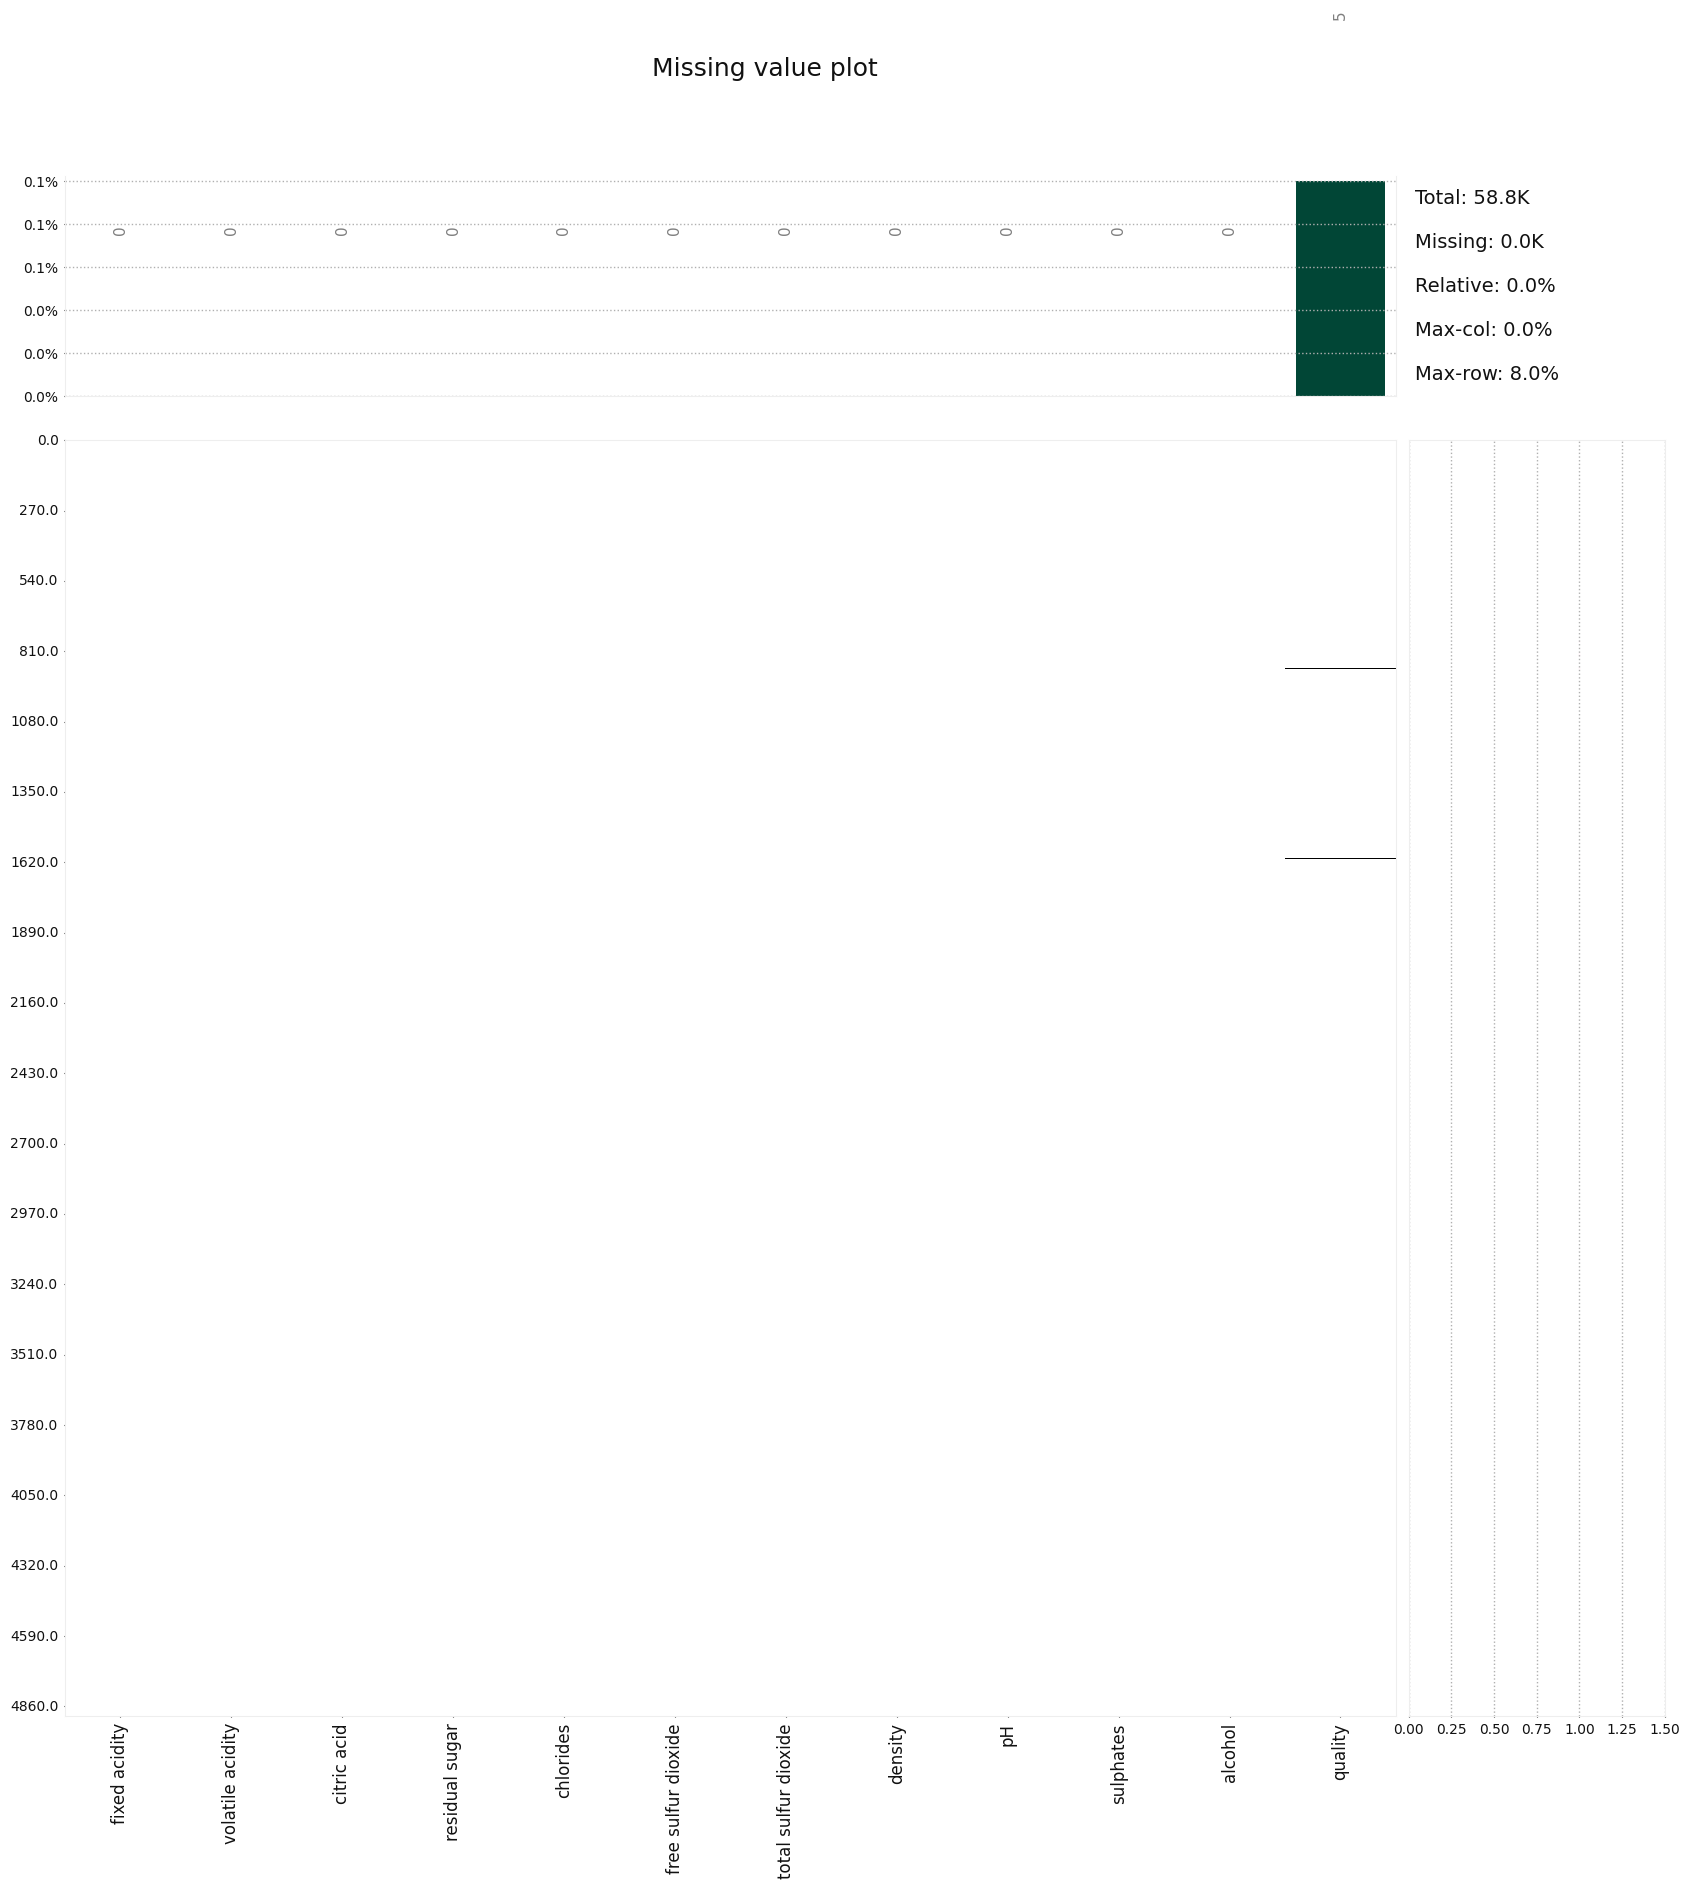

In [ ]:
### Xử lý tiền dữ liệu.
# Vẽ biểu đồ mô tả dữ liệu bị thiếu
import klib # Nhập thư viện
klib.missingval_plot(wine) # Vẽ biểu đồ

In [ ]:
#. Kiểm tra kiểu dữ liệu của từng biến
wine.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [ ]:
#. Kiểm tra các giá trị null
wine.isna().sum()
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 5
dtype: int64

In [ ]:
# Loại bỏ các hàng chứa giá trị NaN
wine = wine.dropna()
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [ ]:
### Chia dữ liệu thành X và Y
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
#In ra X Y
print(X.shape, y.shape)


(4893, 11) (4893,)


In [ ]:
#Chia dữ liệu thành X_train, X_test, y_train, y_test với test_size = 0.20 sử dụng sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
## In hình dạng của X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3914, 11)
(979, 11)
(3914,)
(979,)


In [ ]:
#Áp dụng Chia tỷ lệ chuẩn để có kết quả tối ưu
sc = StandardScaler()


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# **Random Forest Classifier**

In [ ]:
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [ ]:
Y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("KẾT QUẢ:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(y_test, Y_pred_rf)))
res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(rf.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Random Forest Classifier report:

              precision    recall  f1-score   support

         bad       0.78      0.68      0.73       319
        good       0.86      0.91      0.88       660

    accuracy                           0.83       979
   macro avg       0.82      0.80      0.80       979
weighted avg       0.83      0.83      0.83       979


Độ chính xác trung bình:	0.7702

Độ lệch chuẩn:	0.0272

Ma trận nhầm lẫn:
[[218 101]
 [ 61 599]]

Độ chính xác:		83.45%


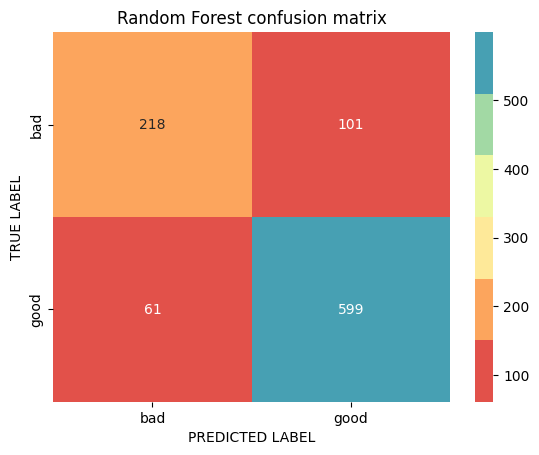

In [ ]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['bad', 'good'], 
                                 index=['bad', 'good'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=palette)
plt.title('Random Forest confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL');

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


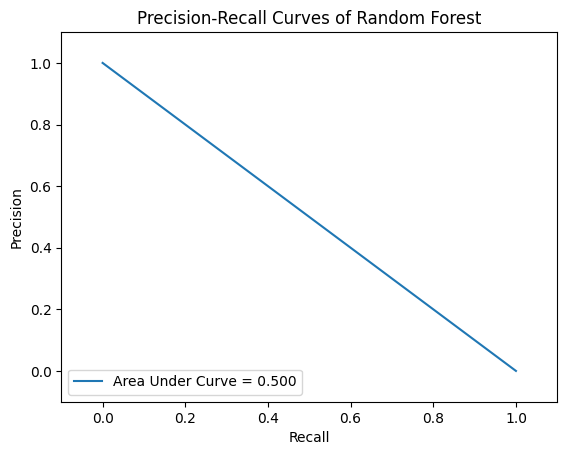

In [ ]:
#Đồ thị đường cong PR (Precision-Recall Curves)
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_rf,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

# **Support Vector Machine Algorithm**

In [ ]:
### Support Vector Machine Algorithm
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train,y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [ ]:
Y_pred_svm = svm.predict(X_test)

In [ ]:
# IN MA TRẠN NHẦM LẪN VÀ CHIA NÓ THÀNH 4 PHẦN+
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_svm)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[196 123]
 [ 78 582]]

True Positives(TP) =  196

True Negatives(TN) =  582

False Positives(FP) =  123

False Negatives(FN) =  78


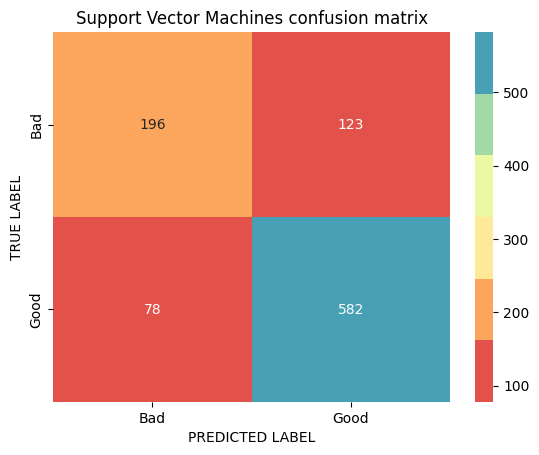

In [ ]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_svm)
cm_matrix = pd.DataFrame(data=cm, columns=['Bad', 'Good'], 
                                 index=['Bad', 'Good'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=palette)
plt.title('Support Vector Machines confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL'); 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
print("KẾT QUẢ:\n")
#Report
print('Support Vector Machines Classifier Report:\n\n{}\n'.format(classification_report(y_test, Y_pred_svm)))
res = cross_val_score(svm, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(svm.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Support Vector Machines Classifier Report:

              precision    recall  f1-score   support

         bad       0.72      0.61      0.66       319
        good       0.83      0.88      0.85       660

    accuracy                           0.79       979
   macro avg       0.77      0.75      0.76       979
weighted avg       0.79      0.79      0.79       979


Độ chính xác trung bình:	0.7559

Độ lệch chuẩn:	0.0337

Ma trận nhầm lẫn:
[[196 123]
 [ 78 582]]

Độ chính xác:		79.47%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


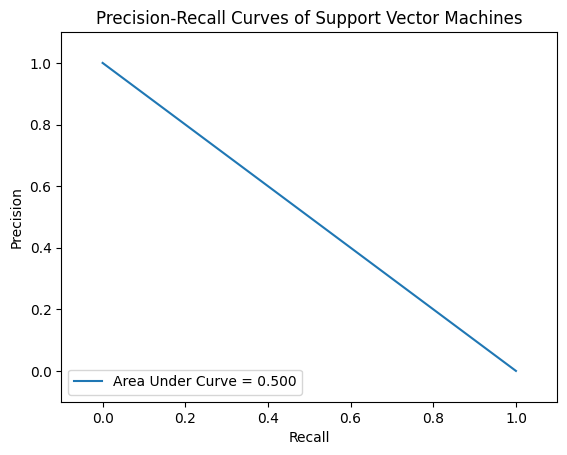

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_svm,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Support Vector Machines')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

# **Decision Tree**

In [ ]:
### Decision Tree 

from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
Y_pred_dt = dt.predict(X_test)


In [ ]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Đánh giá mô hình bằng cách sử dụng dữ liệu thử nghiệm
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

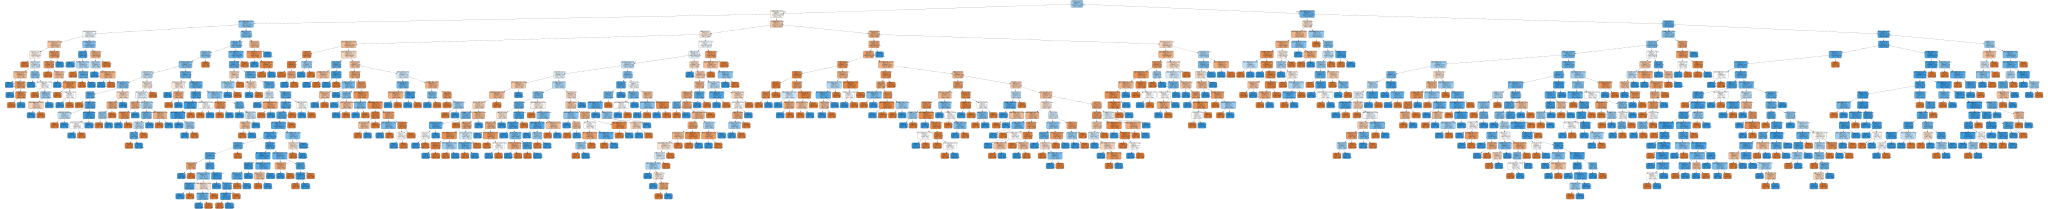

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeClassifier as clf
Y_name = ['True','Flase']
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Y_pred_dt = clf.predict(X_test)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph



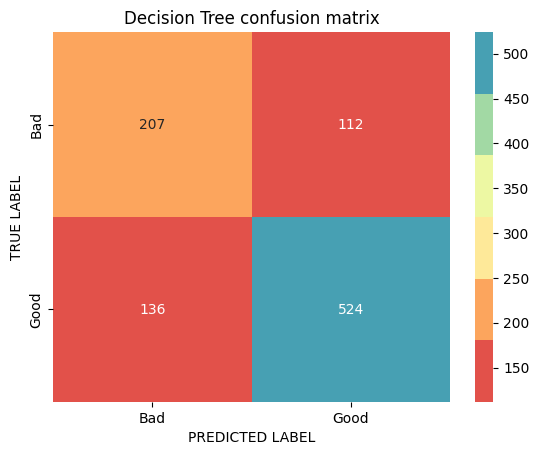

In [ ]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_dt)
cm_matrix = pd.DataFrame(data=cm, columns=['Bad', 'Good'], 
                                 index=['Bad', 'Good'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=palette)
plt.title('Decision Tree confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL'); 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
print("KẾT QUẢ:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(y_test, Y_pred_dt)))
res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(dt.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

         bad       0.60      0.65      0.63       319
        good       0.82      0.79      0.81       660

    accuracy                           0.75       979
   macro avg       0.71      0.72      0.72       979
weighted avg       0.75      0.75      0.75       979


Độ chính xác trung bình:	0.7079

Độ lệch chuẩn:	0.0349

Ma trận nhầm lẫn:
[[179 140]
 [118 542]]

Độ chính xác:		73.65%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


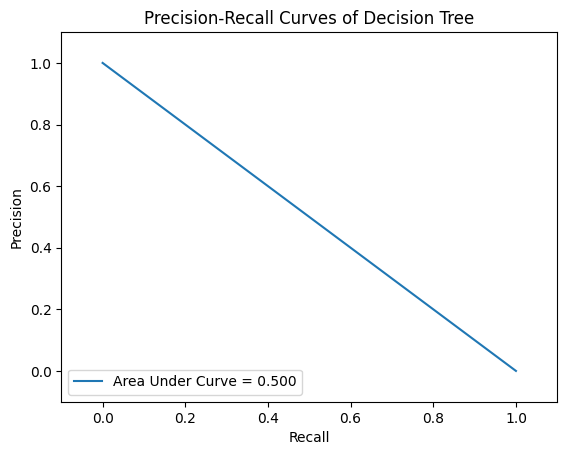

In [ ]:
#Đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_dt,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()